In [38]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
library(dplyr)

Cargar los datos en un dataframe llamado: airbnb

In [27]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [28]:
head(airbnb, 6)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [29]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb) <- newnames

head(airbnb, 3)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [30]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [34]:
# Tomando la sugerencia de los comentarios en la primer revisión
library(stringr)
airbnb$CodigoPostal[airbnb$CodigoPostal %in% c('','-','28')]<-NA
airbnb$CodigoPostal[!grepl("^28",airbnb$CodigoPostal)]<-NA
airbnb$CodigoPostal <- str_replace_all(airbnb$CodigoPostal, "28002\n28002", "28002")
airbnb$CodigoPostal <- str_replace_all(airbnb$CodigoPostal, "28051\n28051", "28002")
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815'] <- '28015'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2804'] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805'] <- '28005'

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [35]:
unique(airbnb$CodigoPostal)

[1] "28004"  "28015"  "28013"  "28005"  "28012"  "28014"  "28045"  NA      
 [9] "28007"  "28028"  "28009"  "28001"  "28006"  "28010"  "28002"  "28034" 
[17] "28050"  "28008"  "28011"  "28049"  "28038"  "28053"  "28047"  "28025" 
[25] "28019"  "28024"  "28016"  "28036"  "28046"  "28039"  "28020"  "28003" 
[33] "28029"  "28054"  "28041"  "28026"  "28058"  "28018"  "28030"  "28017" 
[41] "28027"  "28043"  "28033"  "28055"  "28021"  "28032"  "28037"  "28022" 
[49] "28042"  "28094"  "280013" "28035"  "28040"  "28031"  "28044"  "28105" 
[57] "28023"  "28051"  "28850"  "28048"  "28056"  "28060"  "28052"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [37]:

codigos_postales <- airbnb %>% count(CodigoPostal, sort = TRUE)
head(codigos_postales, 5)
tail(codigos_postales, 5)

,CodigoPostal,n
,<chr>,<int>
1,28012,2060
2,28004,1795
3,28005,1195
4,28013,1019
5,28014,630


,CodigoPostal,n
,<chr>,<int>
59,28058,1
60,28060,1
61,28094,1
62,28105,1
63,28850,1


¿Cuales son los barrios que hay en el código postal 28012?

In [40]:
barrios_28012 <- unique(airbnb$Barrio[airbnb$CodigoPostal == "28012"])
barrios_28012

[1] Sol             Acacias         <NA>            Palos de Moguer
 [5] Embajadores     Cortes          Palacio         Universidad    
 [9] Delicias        Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [41]:
airbnb %>% filter(CodigoPostal == "28012") %>% count(Barrio)

Barrio,n
<fct>,<int>
Acacias,13
Arapiles,1
Atocha,1
Cortes,216
Delicias,1
Embajadores,1449
Goya,1
Palacio,27
Palos de Moguer,46


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [43]:
cat('Cantidad de barrios', as.character(length(unique(airbnb$Barrio))))
unique(airbnb$Barrio)

Cantidad de barrios 125

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [44]:
barrios_populares <- airbnb %>% count(Barrio, sort = TRUE)
head(barrios_populares, 5)

,Barrio,n
,<fct>,<int>
1,Embajadores,1844
2,Universidad,1358
3,Palacio,1083
4,Sol,940
5,Justicia,785


¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [46]:
cat('Hay ', length(unique(airbnb$TipoAlquiler)), 'tipos de alquiler')
unique(airbnb$TipoAlquiler)
airbnb %>% count(TipoAlquiler)

Hay  3 tipos de alquiler

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

TipoAlquiler,n
<fct>,<int>
Entire home/apt,7903
Private room,5113
Shared room,191


Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


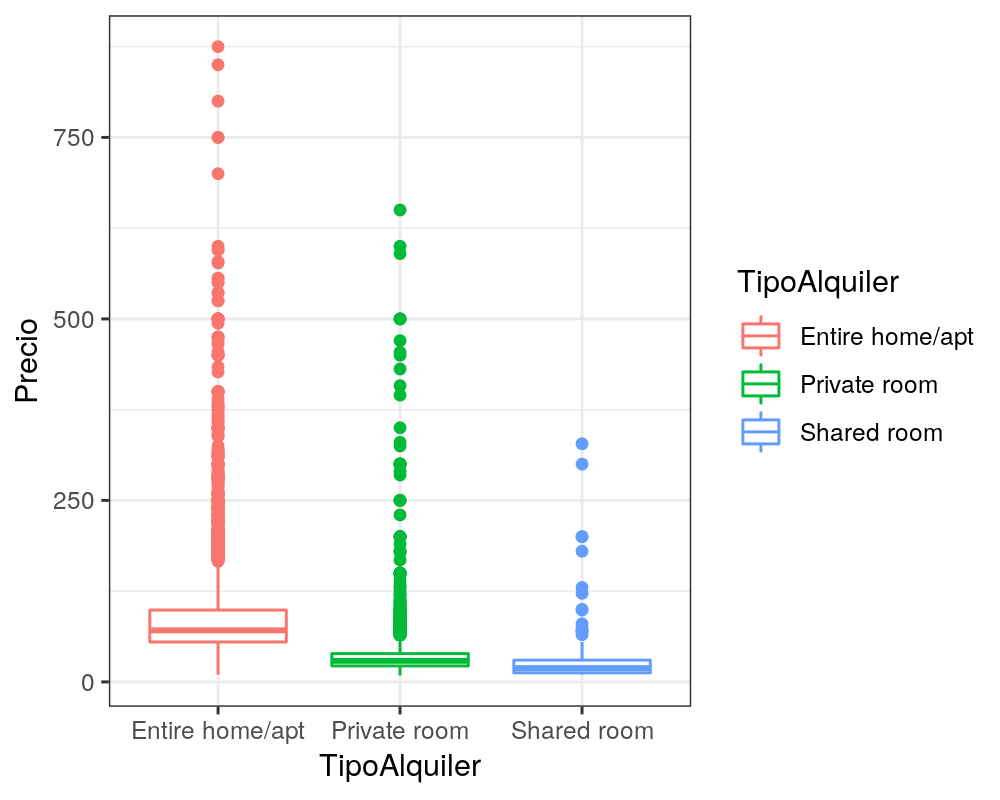

In [49]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=5 , repr.plot.res = 200)
ggplot(airbnb, aes(x = TipoAlquiler, y = Precio, color=TipoAlquiler)) + geom_boxplot() + theme_bw()


Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [50]:
mean_price_by_rent_type <- aggregate(Precio ~ TipoAlquiler, airbnb, mean, na.rm = TRUE)
mean_price_by_rent_type

TipoAlquiler,Precio
<fct>,<dbl>
Entire home/apt,87.29661
Private room,34.25514
Shared room,29.85340


In [52]:
# Comprobaciones de significancia

# Calcular el precio medio de alquiler para cada tipo de alquiler
mean_price_by_alquiler <- aggregate(Precio ~ TipoAlquiler, airbnb, mean, na.rm = TRUE)

# Comprobar si las diferencias son estadísticamente significativas usando ANOVA
# Primero ajustamos un modelo lineal
modelo_lineal_alquiler <- lm(Precio ~ TipoAlquiler, data = airbnb)

# Realizamos el test ANOVA
resultado_anova <- anova(modelo_lineal_alquiler)
print(resultado_anova)

# Si el p-valor es menor que 0.05, las diferencias son estadísticamente significativas
if(resultado_anova$`Pr(>F)`[1] < 0.05) {
  cat("Las diferencias son estadísticamente significativas.\n")
} else {
  cat("Las diferencias no son estadísticamente significativas.\n")
}

cat('------------------------------------------------------')
# Si no se cumplen los supuestos de ANOVA, utiliza el test de Kruskal-Wallis
resultado_kruskal <- kruskal.test(Precio ~ TipoAlquiler, data = airbnb)
print(resultado_kruskal)

# Si el p-valor es menor que 0.05, las diferencias son estadísticamente significativas
if(resultado_kruskal$p.value < 0.05) {
  cat("Las diferencias son estadísticamente significativas.\n")
} else {
  cat("Las diferencias no son estadísticamente significativas.\n")
}



Analysis of Variance Table

Response: Precio
                Df   Sum Sq Mean Sq F value    Pr(>F)    
TipoAlquiler     2  8981217 4490608  1827.8 < 2.2e-16 ***
Residuals    13195 32417217    2457                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Las diferencias son estadísticamente significativas.
------------------------------------------------------
	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16

Las diferencias son estadísticamente significativas.


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [126]:
airbnb_entire <- subset(airbnb, TipoAlquiler == "Entire home/apt")

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [54]:
barrios_entire_populares <- airbnb_entire %>% count(Barrio, sort = TRUE)
head(barrios_entire_populares, 5)

,Barrio,n
,<fct>,<int>
1,Embajadores,1228
2,Universidad,984
3,Palacio,769
4,Sol,701
5,Cortes,574


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [57]:
mean_price_entire_by_barrio <- aggregate(Precio ~ Barrio, airbnb_entire, mean, na.rm = TRUE)
mean_price_entire_by_barrio


Barrio,Precio
<fct>,<dbl>
Abrantes,46.00000
Acacias,68.16393
Adelfas,68.72727
Aeropuerto,38.00000
Aguilas,54.50000
Alameda de Osuna,138.75000
Almagro,109.18557
Almenara,65.68000
Almendrales,77.50000


In [77]:
top_mean_price_entire <- mean_price_entire_by_barrio[order(mean_price_entire_by_barrio$Precio, decreasing = TRUE),]
head(top_mean_price_entire, 5)

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [82]:
barrios_top5 <- head(top_mean_price_entire$Barrio, 5)
top_barrios_freq <- subset(barrios_entire_populares, Barrio %in% barrios_top5)
# top_barrios_freq
top5_mean_price_entire <- merge(top_mean_price_entire, top_barrios_freq, by = "Barrio")
head(top5_mean_price_entire, 5)

,Barrio,Precio,n
,<fct>,<dbl>,<int>
1,Castellana,141.3889,73
2,El Plantío,150.0000,1
3,Fuentelareina,180.0000,2
4,Palomas,309.7500,4
5,Recoletos,161.9254,135


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [101]:
top100_mean_price_entire <- merge(top_mean_price_entire, barrios_entire_populares, by = "Barrio")
filter_top_mean_price_entire <- top100_mean_price_entire %>% filter(n > 100)
top5_mean_price_entire_100 <- head(filter_top_mean_price_entire[order(filter_top_mean_price_entire$Precio, decreasing = TRUE),],5)
top5_mean_price_entire_100

,Barrio,Precio,n
,<fct>,<dbl>,<int>
8,Recoletos,161.92537,135
4,Goya,111.33803,142
9,Sol,100.75036,701
10,Trafalgar,98.57848,223
5,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


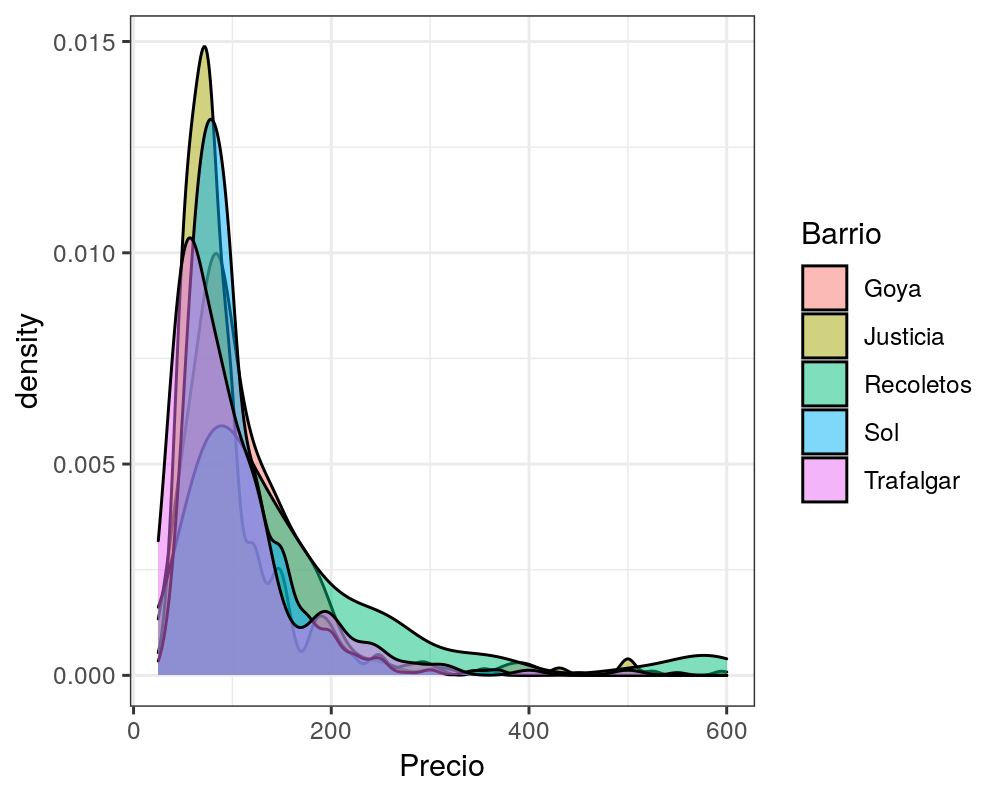

In [102]:
barrios_top5_100 <- top5_mean_price_entire_100$Barrio
airbnb_entire_top5_100 <- subset(airbnb_entire, Barrio %in% barrios_top5_100)
ggplot(airbnb_entire_top5_100, aes(x = Precio, fill = Barrio)) + geom_density(alpha = 0.5) + theme_bw()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [103]:
mean_size_entire_by_barrio <- aggregate(MetrosCuadrados ~ Barrio, airbnb_entire_top5_100, mean, na.rm = TRUE)
top5_mean_price_entire_100 <- merge(top5_mean_price_entire_100, mean_size_entire_by_barrio, by = "Barrio")
top5_mean_price_entire_100

Barrio,Precio,n,MetrosCuadrados
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


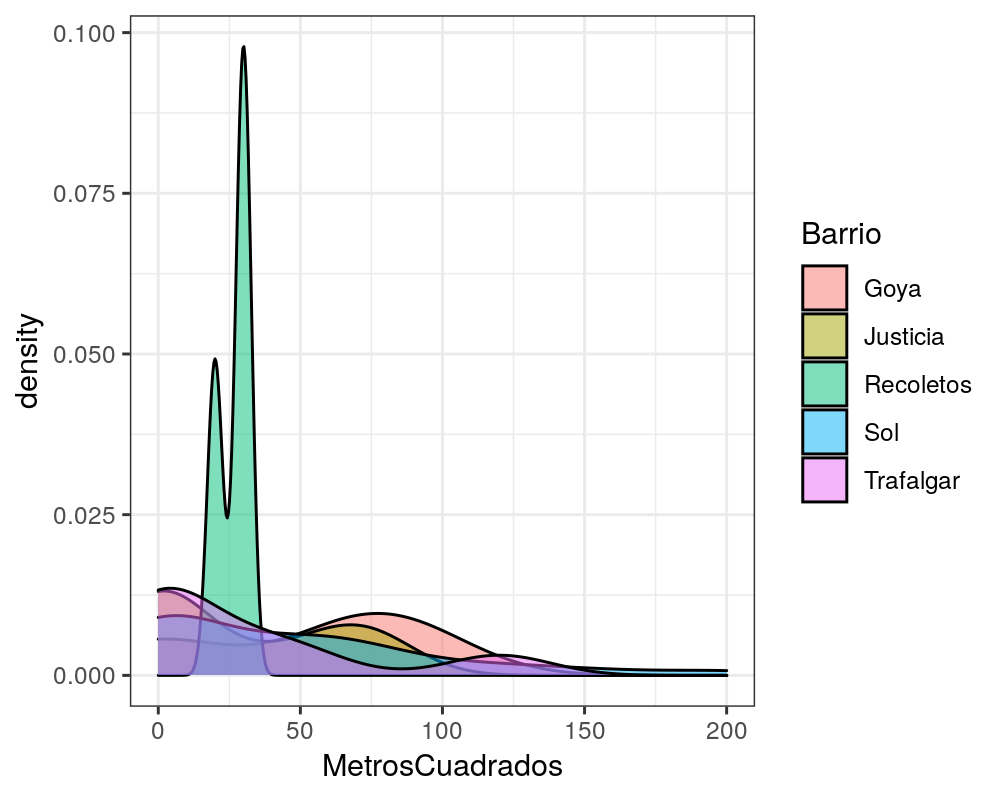

In [104]:
ggplot(airbnb_entire_top5_100, aes(x = MetrosCuadrados, fill = Barrio)) + geom_density(alpha = 0.5) + theme_bw()

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [108]:
# Instalar el paquete 'car'
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’


Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”


In [111]:
# Cargar la librería
#library(car)

# Comprobar normalidad con el test de Shapiro-Wilk
shapiro_results <- shapiro.test(top5_mean_price_entire_100$MetrosCuadrados)
print(shapiro_results)

# Comprobar homocedasticidad con el test de Levene
levene_results <- leveneTest(MetrosCuadrados ~ Barrio, data = top5_mean_price_entire_100)
print(levene_results)

# Si se cumplen los supuestos de normalidad y homocedasticidad (p > 0.05), usamos ANOVA
if (shapiro_results$p.value > 0.05 & levene_results$"Pr(>F)"[1] > 0.05) {
  anova_results <- aov(MetrosCuadrados ~ Barrio, data = top5_mean_price_entire_100)
  print(summary(anova_results))
  
} else {
  # Si no se cumplen los supuestos, usamos el test de Kruskal-Wallis
  kruskal_results <- kruskal.test(MetrosCuadrados ~ Barrio, data = top5_mean_price_entire_100)
  print(kruskal_results)
}



	Shapiro-Wilk normality test

data:  top5_mean_price_entire_100$MetrosCuadrados
W = 0.81942, p-value = 0.1156



ERROR: Error in leveneTest(MetrosCuadrados ~ Barrio, data = top5_mean_price_entire_100): could not find function "leveneTest"


#### Se omite Levene porque no ejecuto bien la adición de la libreria

In [163]:
#mean_size_entire_by_barrio

In [162]:
#barrio_data <- subset(airbnb_entire, Barrio %in% mean_size_entire_by_barrio$Barrio)
#barrio_data

In [136]:
# Crear una lista para almacenar los resultados de cada barrio
results_list <- list()

# Realizar un test ANOVA o Kruskal-Wallis para cada barrio en top5_mean_price_entire_100
for (barrio in unique(top5_mean_price_entire_100$Barrio)) {
  print(paste("Barrio:", barrio))
  
  # Filtrar datos del barrio actual
  barrio_data <- subset(airbnb_entire, Barrio %in% mean_size_entire_by_barrio$Barrio)
  barrio_data
  
  # Verificar si el tamaño de la muestra es suficiente
  if (nrow(barrio_data) >= 3) {
    # Comprobar normalidad con el test de Shapiro-Wilk
    shapiro_results <- shapiro.test(barrio_data$MetrosCuadrados)
    print(shapiro_results)
    
    # Comprobar homocedasticidad con oneway.test (alternativa al test de Levene)
    oneway_results <- oneway.test(MetrosCuadrados ~ Barrio, data = barrio_data)
    print(oneway_results)
    
    # Si se cumplen los supuestos de normalidad y homocedasticidad (p > 0.05), usamos ANOVA
    if (shapiro_results$p.value > 0.05 & oneway_results$p.value > 0.05) {
      anova_results <- aov(MetrosCuadrados ~ Barrio, data = barrio_data)
      print(summary(anova_results))
      
    } else {
      # Si no se cumplen los supuestos, usamos el test de Kruskal-Wallis
      kruskal_results <- kruskal.test(MetrosCuadrados ~ Barrio, data = barrio_data)
      print(kruskal_results)
    }
    
    # Almacenar los resultados en la lista de resultados
    results_list[[barrio]] <- list(
      shapiro = shapiro_results,
      oneway = oneway_results,
      test = ifelse(shapiro_results$p.value > 0.05 & oneway_results$p.value > 0.05, "ANOVA", "Kruskal-Wallis")
    )
  } else {
    print("El tamaño de la muestra es insuficiente para realizar las pruebas.")
  }
    cat('************************************************************* \n')
}

# Mostrar la lista de resultados
cat('***********************RESULTADOS************************************** \n')
print(results_list)


[1] "Barrio: Goya"

	Shapiro-Wilk normality test

data:  barrio_data$MetrosCuadrados
W = 0.82315, p-value = 5.323e-09


	One-way analysis of means (not assuming equal variances)

data:  MetrosCuadrados and Barrio
F = 1.4788, num df = 4.000, denom df = 10.532, p-value = 0.2767


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574

************************************************************* 
[1] "Barrio: Justicia"

	Shapiro-Wilk normality test

data:  barrio_data$MetrosCuadrados
W = 0.82315, p-value = 5.323e-09


	One-way analysis of means (not assuming equal variances)

data:  MetrosCuadrados and Barrio
F = 1.4788, num df = 4.000, denom df = 10.532, p-value = 0.2767


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574

************************************************************* 
[1] "Barrio: Recoletos"

	Shapiro-Wilk normality test

data:

In [137]:
cat('No hay evidencia suficiente para decir que los departamentos son diferentes, debido a su p valor')

No hay evidencia suficiente para decir que los departamentos son diferentes, debido a su p valor

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [150]:
barrio_sol <- subset(airbnb_entire, Barrio == "Sol")
#modelo_lineal <- lm(Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados, data = barrio_sol)

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [151]:
cor_matrix <- cor(barrio_sol[,c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados")], use = "complete.obs")
cor_matrix

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6873719,0.7017290,0.4820549
NumDormitorios,0.6873719,1.0000000,0.7853809,0.5684521
MaxOcupantes,0.7017290,0.7853809,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


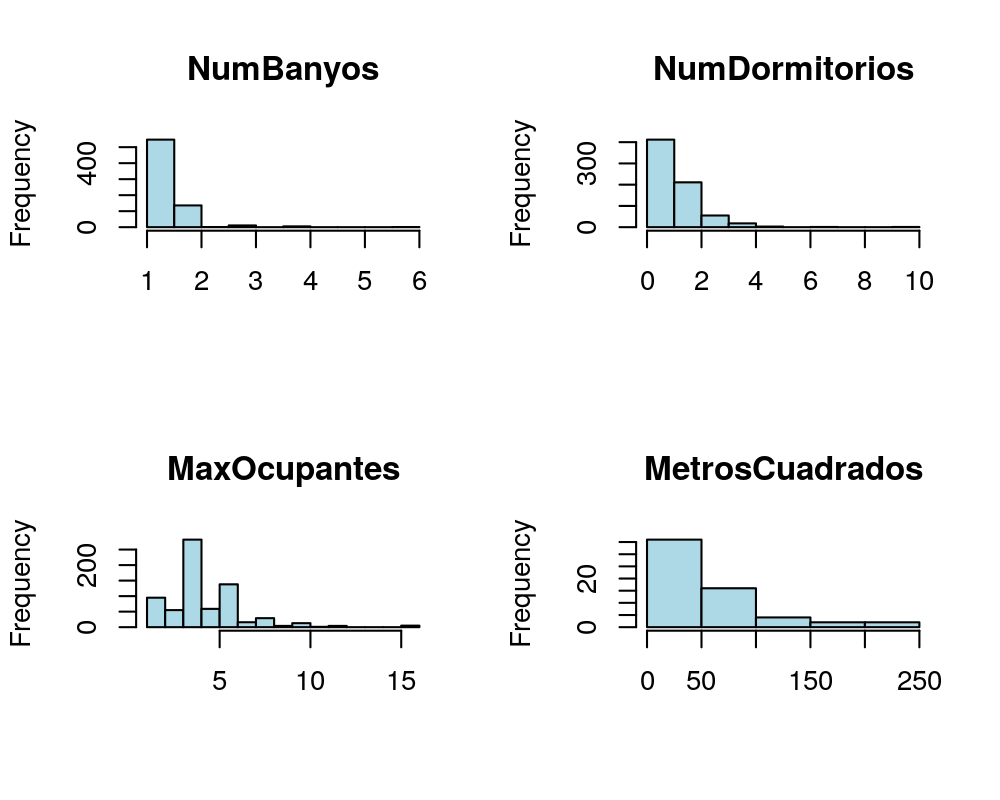

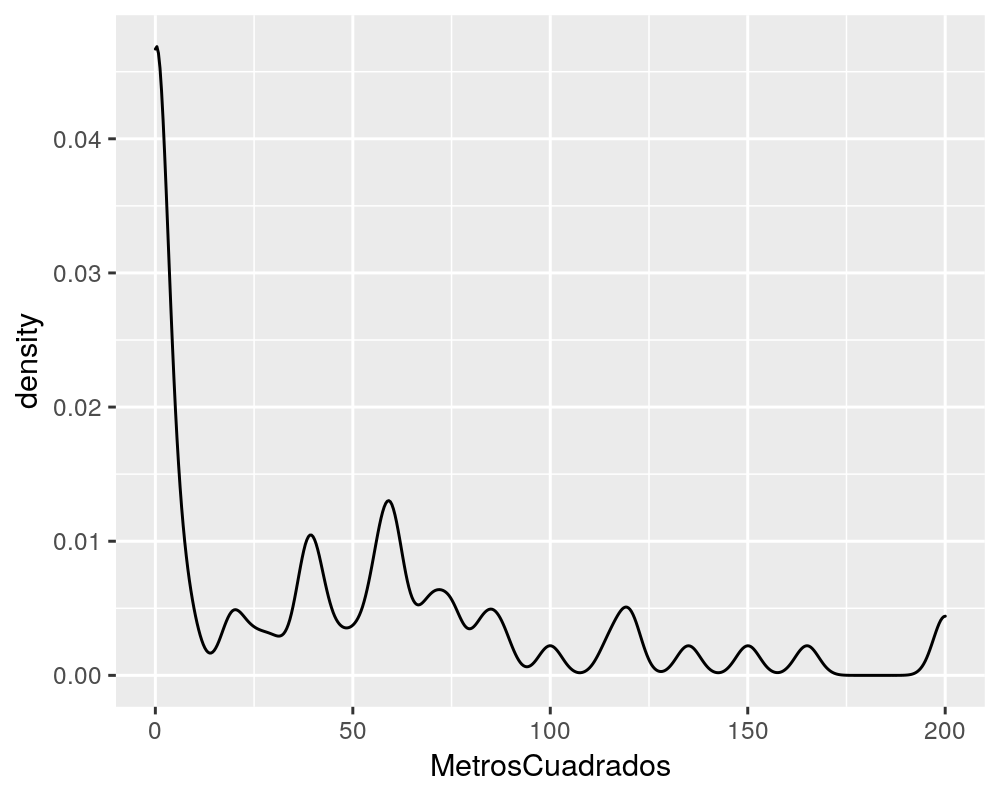

In [152]:
par(mfrow = c(2, 2))
hist(barrio_sol$NumBanyos, main = "NumBanyos", xlab = "", col = "lightblue")
hist(barrio_sol$NumDormitorios, main = "NumDormitorios", xlab = "", col = "lightblue")
hist(barrio_sol$MaxOcupantes, main = "MaxOcupantes", xlab = "", col = "lightblue")
hist(barrio_sol$MetrosCuadrados, main = "MetrosCuadrados", xlab = "", col = "lightblue")
ggplot(barrio_sol,aes(x=MetrosCuadrados))+geom_density(bw=3)

In [153]:
barrio_sol <- subset(barrio_sol, MetrosCuadrados <= 200)
barrio_sol <- subset(barrio_sol, MetrosCuadrados > 16) ## como mi habitación
barrio_sol <- subset(barrio_sol, NumDormitorios > 0)

In [154]:
nrow(barrio_sol)

[1] 29

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [155]:
modelo_lineal_filtrado <- lm(Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados, data = barrio_sol)
summary(modelo_lineal_filtrado)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.301 -18.606   0.374  12.365  65.750 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      37.5146    13.6701   2.744 0.011296 *  
NumBanyos       -13.0919    15.2157  -0.860 0.398074    
NumDormitorios   38.9647     9.7682   3.989 0.000542 ***
MaxOcupantes      9.3459     5.1101   1.829 0.079866 .  
MetrosCuadrados  -0.4356     0.3192  -1.365 0.184980    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.8 on 24 degrees of freedom
Multiple R-squared:  0.7462,	Adjusted R-squared:  0.7039 
F-statistic: 17.64 on 4 and 24 DF,  p-value: 7.112e-07


In [170]:
modelo_lineal_filtrado <- lm(Precio ~ NumDormitorios + MaxOcupantes + MetrosCuadrados, data = barrio_sol)
summary(modelo_lineal_filtrado)


Call:
lm(formula = Precio ~ NumDormitorios + MaxOcupantes + MetrosCuadrados, 
    data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.101 -15.588   0.816  17.445  74.874 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      33.7724    12.8923   2.620 0.014750 *  
NumDormitorios   36.1298     9.1478   3.950 0.000564 ***
MaxOcupantes      6.1879     3.5370   1.749 0.092475 .  
MetrosCuadrados  -0.3411     0.2981  -1.144 0.263431    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.64 on 25 degrees of freedom
Multiple R-squared:  0.7384,	Adjusted R-squared:  0.707 
F-statistic: 23.52 on 3 and 25 DF,  p-value: 1.881e-07


In [171]:
modelo_lineal_filtrado <- lm(Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)
summary(modelo_lineal_filtrado)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.063 -13.897  -0.146  20.761  68.197 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      39.9404    12.8829   3.100  0.00461 ** 
NumDormitorios   41.8632     8.8726   4.718 7.07e-05 ***
MetrosCuadrados  -0.1163     0.2795  -0.416  0.68066    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.8 on 26 degrees of freedom
Multiple R-squared:  0.7063,	Adjusted R-squared:  0.6837 
F-statistic: 31.27 on 2 and 26 DF,  p-value: 1.208e-07


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [172]:
modelo_lineal_habitaciones <- lm(Precio ~ NumDormitorios, data = barrio_sol)
modelo_lineal_metros <- lm(Precio ~ MetrosCuadrados, data = barrio_sol)
summary(modelo_lineal_habitaciones)$r.squared
summary(modelo_lineal_metros)$r.squared
cat('Definitivamente NumDormitorios, con un r^2 de ', summary(modelo_lineal_habitaciones)$r.squared)

[1] 0.7043809

[1] 0.4548973

Definitivamente NumDormitorios, con un r^2 de  0.7043809

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [158]:
coef_metros <- summary(modelo_lineal_metros)$coefficients[2, 1]
coef_metros
conf_int_metros <- confint(modelo_lineal_metros, level = 0.95)[2,]
conf_int_metros

[1] 0.9818523

2.5 %    97.5 % 
0.5574397 1.4062649

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [159]:
coef_habitaciones <- summary(modelo_lineal_habitaciones)$coefficients[2, 1]
conf_int_habitaciones <- confint(modelo_lineal_habitaciones, level = 0.95)[2,]
conf_int_habitaciones

2.5 %   97.5 % 
28.86533 48.71011

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [160]:
num_3_dormitorios <- sum(barrio_sol$NumDormitorios == 3, na.rm = TRUE)
total_entradas <- nrow(barrio_sol)
prob_3_dormitorios <- num_3_dormitorios / total_entradas
prob_3_dormitorios

[1] 0.06896552

In [164]:
install.packages("binom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [165]:
library(binom)
conf_int_prob <- binom.confint(num_3_dormitorios, total_entradas, conf.level = 0.95, method = "wilson")
conf_int_prob

,method,x,n,mean,lower,upper
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,wilson,2,29,0.06896552,0.01912127,0.2196458


In [169]:
cat('La probabilidad es de ', conf_int_prob$mean, '\n')
cat('El intervalo esta entre ', conf_int_prob$lower, ' y ', conf_int_prob$upper)

La probabilidad es de  0.06896552 
El intervalo esta entre  0.01912127  y  0.2196458